# Soil Temperature Model

Soil temperature is one of those variables that follow the theory closely. In this exrcise we will implement an analytical solution of the heat conduction-diffusion equation. The model is simple and accounts for soil temperature in time and soil depth. This model is robust enough to be used for research.

The model states that the annual mean temperature at all soil depths is the same. At increasing depths the thermal amplitude decreases and the timing of maximum and minimum temperatures experience a delay. This makes sense since it takes time for heat to move from the surface to deeper layers and the thermal fluctuations are higher near the surface than at depth as a consequence of heat losses primarily due to radiation and convection.

## Model

$$ T(z,t) = T_{avg} + A \ e^{-z/d} \ sin(\omega t - z/d  - \phi)$$

$T$ is the soil temperature at time $t$ and depth $z$

$z$ is the soil depth in meters

$t$ is the time in days of year

$T_{avg}$ is the annual average temperature at the soil surface

$A$ is the thermal amplitude: $(T_{max} + T_{min})/2$. 

$\omega$ is the angular frequency: $2\pi / P$

$P$ is the period. Should be in the same units as $t$. The period is 365 days for annual oscillations and 24 hours for daily oscillations.

$\phi$ is the phase constant, which is defined as: $\frac{\pi}{2} + \omega t_0$

$t_0$ is the time lag from an arbitrary starting point. In this case are days from January 1.
 
$d$ is the damping depth, which is defined as: $\sqrt{(2 D/ \omega)}$. It has length units.

$D$ is thermal diffusivity in $m^2 d^{-1}$. The thermal diffusivity is defined as $\kappa$ / *C*

$\kappa$ is the soil thermal conductivity in $J m^{-1} K^{-1} d^{-1}$

$C$ is the soil volumetric heat capacity in $J m^{-3} K^{-1}$




## Assumptions

- Constant soil thermal diffusivity.

- Uniform soil texture

- Temperature in deep layers approximate the mean annual air temperature

- In situation where we don't have observations of soil temperature at the surface we also assume that the soil surface temperature is equal to the air temperature.

In [83]:
# Import modules
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## Model inputs

In [98]:
# Constants
T_avg = 25 # Annual average temperature at the soil surface
A0 = 10    # Annual thermal amplitude at the soil surface
D = 0.203    # Thermal diffusivity obtained from KD2 Pro instrument [mm^2/s]
D = D / 100 * 86400 # convert to cm^2/day
period = 365 # days
omega = 2*np.pi/period
t_0 = 15   # Time lag in days from January 1
phi = np.pi/2 + omega*t_0 # Phase constant
d = (2*D/omega)**(1/2) # Damping depth 
D

175.39200000000002

## Define model

In [99]:
# Define model as lambda function
T_soilfn = lambda doy,z: T_avg + A0 * np.exp(-z/d) * np.sin(omega*doy - z/d - phi)


## Soil temperature for a specific depth as a function of time

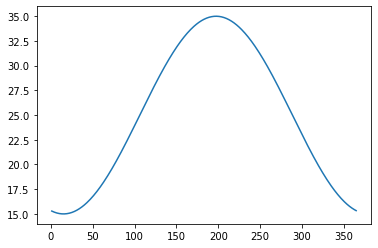

In [100]:
doy = np.arange(1,366)
z = 0
T_soil = T_soilfn(doy,z)

# Plot
plt.figure()
plt.plot(doy,T_soil)
plt.show()


## Soil temperature for a specific day of the year as a function of depth


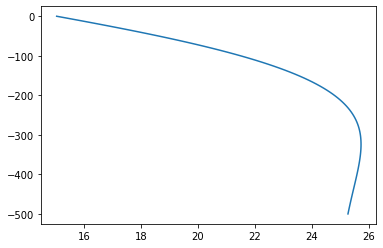

In [107]:
doy = 10
Nz = 100 # Number of interpolation
zmax = 500 # cm
z = np.linspace(0,zmax,Nz) 
T = T_soilfn(doy,z)

plt.figure()
plt.plot(T,-z)
plt.show()


## Soil temperature as a function of both DOY and depth

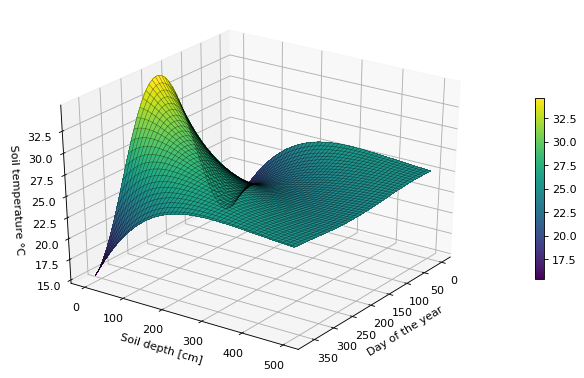

In [135]:
doy = np.arange(1,366)
z = np.linspace(0,500,1000) 
doy_grid,z_grid = np.meshgrid(doy,z)

# Predict soil temperature for each grid
T_grid = T_soilfn(doy_grid,z_grid)


# Create figure
fig = plt.figure(figsize=(10, 6), dpi=80) # 10 inch by 6 inch dpi = dots per inch

# Get figure axes and convert it to a 3D projection
ax = fig.gca(projection='3d')

# Add surface plot to axes. Save this surface plot in a variable
surf = ax.plot_surface(doy_grid, z_grid, T_grid, cmap='viridis', antialiased=False)

# Add colorbar to figure based on ranges in the surf map.
fig.colorbar(surf, shrink=0.5, aspect=20)

# Wire mesh
frame = surf = ax.plot_wireframe(doy_grid, z_grid, T_grid, linewidth=0.5, color='k', alpha=0.5)

# Label x,y, and z axis
ax.set_xlabel("Day of the year")
ax.set_ylabel('Soil depth [cm]')
ax.set_zlabel('Soil temperature \N{DEGREE SIGN}C')

# Set position of the 3D plot
ax.view_init(elev=30, azim=35) # elevation and azimuth. Change their value to see what happens.

plt.show()

## Interactive plots

In [32]:
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource, save
from bokeh.layouts import row
from bokeh.models import HoverTool
from bokeh.io import export_svgs
output_notebook()


Loading BokehJS ...

In [145]:
# Set data for p1
doy = np.arange(1,366)
z = 0
source_p1 = ColumnDataSource(data=dict(x=doy, y=T_soilfn(doy,z)))

# Define tools for p1
hover_p1 = HoverTool(
        tooltips=[
            ("Time (days)", "@x{0.}"),
            ("Temperature (Celsius)","@y{0.00}" )
        ]
    )

# Create plots
p1 = figure(y_range=[0,50],
            width=400,
            height=300,
            title="Soil Temperature as a Function of Time",
            tools=[hover_p1],
            toolbar_location="right")

p1.xaxis.axis_label = 'Time [hours]'
p1.yaxis.axis_label = 'Temperature'
p1.line('x','y',source=source_p1)


# Set data for p2
doy = 150
z = np.linspace(0,500,100)
source_p2 = ColumnDataSource(data=dict(y=-1*z, x=T_soilfn(150,z)))

# Define tools for p1
hover_p2 = HoverTool(
        tooltips=[
            ("Depth (cm)","@y{0.0}"),
            ("Temperature (Celsius)","@x{0.00}")
        ]
    )

# Create plots
p2 = figure(y_range=[0,-500],
            width=400,
            height=300,
            title="Soil Temperature as a Function of Soil Depth",
            tools=[hover_p2],
            toolbar_location="right")

p2.xaxis.axis_label = 'Temperature'
p2.yaxis.axis_label = 'Depth (cm)'
p2.min_border_left = 100
p2.line('x','y',source=source_p2)

p1.output_backend = "svg"
p2.output_backend = "svg"

show(row(p1,p2))


## References

Wu, J. and Nofziger, D.L., 1999. Incorporating temperature effects on pesticide degradation into a management model. Journal of Environmental Quality, 28(1), pp.92-100.